# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import date


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:

# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

print(query_url +city)
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
city_name = []
number = 1
#for city in cities:
for city in cities:
    try:
       
        response = requests.get(query_url + city)
        json_response = response.json()
        
        Cloudiness.append(json_response["clouds"]["all"])
        city_name.append(json_response["name"])
        Country.append(json_response["sys"]["country"])
        Lat.append(json_response["coord"]["lat"])
        Lng.append(json_response["coord"]["lon"])
        Max_Temp.append(json_response["main"]["temp_max"])
        Humidity.append(json_response["main"]["humidity"])
        Wind_Speed.append(json_response["wind"]["speed"])
        Date.append(json_response["dt"])
        print("Processing Record {} of {}cities | added {}".format(number,len(cities),city))
        number = number + 1
        time.sleep(2)
    except KeyError:
        print("missing data of record {} {} skipping it".format(number, city))
        number = number + 1

http://api.openweathermap.org/data/2.5/weather?appid=a6f6837f49b5bc81bdc395da6605bd35&units=metric&q=karlstad
Processing Record 1 of 621cities | added aksha
missing data of record 2 mys shmidta skipping it
Processing Record 3 of 621cities | added kamenka
Processing Record 4 of 621cities | added rosetown
Processing Record 5 of 621cities | added leopold
Processing Record 6 of 621cities | added akdepe
Processing Record 7 of 621cities | added hermanus
Processing Record 8 of 621cities | added janauba
missing data of record 9 karauzyak skipping it
Processing Record 10 of 621cities | added victoria
Processing Record 11 of 621cities | added moundou
Processing Record 12 of 621cities | added lichtenau
Processing Record 13 of 621cities | added punta arenas
Processing Record 14 of 621cities | added provideniya
Processing Record 15 of 621cities | added yumen
Processing Record 16 of 621cities | added alenquer
Processing Record 17 of 621cities | added barrow
Processing Record 18 of 621cities | added 

Processing Record 159 of 621cities | added nemuro
Processing Record 160 of 621cities | added dhidhdhoo
Processing Record 161 of 621cities | added kirakira
Processing Record 162 of 621cities | added constitucion
Processing Record 163 of 621cities | added cayenne
Processing Record 164 of 621cities | added usvyaty
Processing Record 165 of 621cities | added chokurdakh
Processing Record 166 of 621cities | added qena
Processing Record 167 of 621cities | added kyzyl-suu
Processing Record 168 of 621cities | added port lincoln
Processing Record 169 of 621cities | added castro
missing data of record 170 andevoranto skipping it
Processing Record 171 of 621cities | added faya
Processing Record 172 of 621cities | added faanui
Processing Record 173 of 621cities | added rio grande
missing data of record 174 marcona skipping it
Processing Record 175 of 621cities | added new norfolk
Processing Record 176 of 621cities | added atasu
Processing Record 177 of 621cities | added iquique
Processing Record 178

Processing Record 316 of 621cities | added pinyug
Processing Record 317 of 621cities | added kirensk
Processing Record 318 of 621cities | added thunder bay
Processing Record 319 of 621cities | added gweta
Processing Record 320 of 621cities | added sinegorskiy
Processing Record 321 of 621cities | added bartica
Processing Record 322 of 621cities | added bandarbeyla
Processing Record 323 of 621cities | added padang
Processing Record 324 of 621cities | added tiksi
Processing Record 325 of 621cities | added tirano
Processing Record 326 of 621cities | added kabompo
Processing Record 327 of 621cities | added husavik
Processing Record 328 of 621cities | added okhotsk
Processing Record 329 of 621cities | added santa maria
Processing Record 330 of 621cities | added antibes
Processing Record 331 of 621cities | added boda
Processing Record 332 of 621cities | added ornskoldsvik
Processing Record 333 of 621cities | added skopelos
Processing Record 334 of 621cities | added sept-iles
Processing Record

Processing Record 475 of 621cities | added nagato
Processing Record 476 of 621cities | added miandrivazo
Processing Record 477 of 621cities | added aberdeen
missing data of record 478 hunza skipping it
Processing Record 479 of 621cities | added ucluelet
Processing Record 480 of 621cities | added wilmington
Processing Record 481 of 621cities | added coxim
Processing Record 482 of 621cities | added hofn
Processing Record 483 of 621cities | added kerman
Processing Record 484 of 621cities | added takoradi
Processing Record 485 of 621cities | added sur
Processing Record 486 of 621cities | added lattes
Processing Record 487 of 621cities | added zhucheng
missing data of record 488 urdzhar skipping it
Processing Record 489 of 621cities | added rumonge
Processing Record 490 of 621cities | added satun
Processing Record 491 of 621cities | added skibbereen
Processing Record 492 of 621cities | added kheralu
Processing Record 493 of 621cities | added asahikawa
Processing Record 494 of 621cities | ad

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
data = [len(cities),len(Cloudiness), len(Country),len(Date),len(Humidity),len(Lat),len(Lng),len(Max_Temp),len(Wind_Speed)]
print("City {}".format(len(cities)))
print("Country {}".format(len(Country)))
print("Date {}".format(len(Date)))
print("Humidity {}".format(len(Humidity)))
print("Latitude {}".format(len(Lat)))
print("Longitude {}".format(len(Lng)))
print("Max Temperature {}".format(len(Max_Temp)))
print("Wind Speed {}".format(len(Wind_Speed)))

City 621
Country 570
Date 570
Humidity 570
Latitude 570
Longitude 570
Max Temperature 570
Wind Speed 570


In [6]:
summary = pd.DataFrame({'City': city_name,"Cloudiness":Cloudiness, "Country":Country,"Date":Date,"Humidity":Humidity, 'Latitude': Lat,'Longitude': Lng,
                            'Maximum Temperature': Max_Temp,"Wind Speed": Wind_Speed})

#Save dataframe as csv
pd.DataFrame.to_csv(summary, 'cities.csv')

summary.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,Aksha,50,RU,1584162325,60,50.28,113.29,-0.17,7.33
1,Kamenka,100,RU,1584162269,93,51.32,42.77,1.11,1.79
2,Rosetown,100,CA,1584162326,65,51.55,-108.00,-15.00,5.36
3,Leopold,90,AU,1584162326,67,-38.18,144.47,17.78,9.80
4,Akdepe,6,TM,1584162326,43,42.06,59.38,11.00,4.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

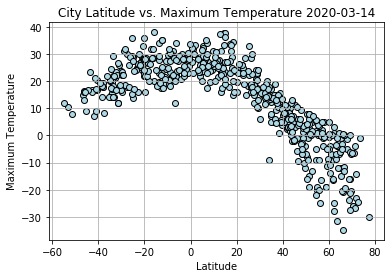

In [17]:
plt.scatter(summary.iloc[:,5],summary.iloc[:,7],facecolors ="lightblue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title(f'City Latitude vs. Maximum Temperature {date.today()}')
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

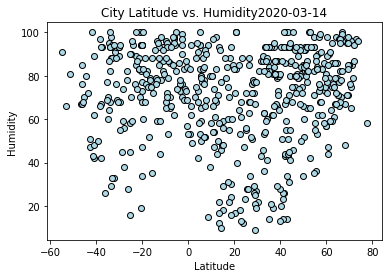

In [18]:
plt.scatter(summary.iloc[:,5],summary.iloc[:,4],facecolors ="lightblue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity{date.today()}")
plt.show()

#### Latitude vs. Cloudiness Plot

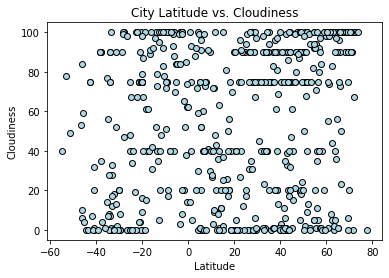

In [19]:
plt.scatter(summary.iloc[:,5],summary.iloc[:,1],facecolors ="lightblue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

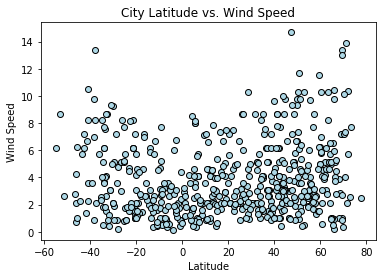

In [20]:
plt.scatter(summary.iloc[:,5],summary.iloc[:,8],facecolors ="lightblue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

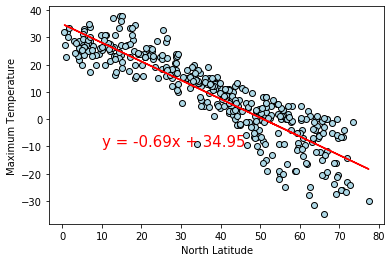

The r-squared is -0.89


In [39]:
# Create Northern and Southern Hemisphere DataFrames
summary_north = summary.loc[summary["Latitude"]>0,:]
x_values = summary_north.iloc[:,5]
y_values = summary_north.iloc[:,7]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors ="lightblue", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
plt.xlabel('North Latitude')
plt.ylabel('Maximum Temperature')
plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is {round(correlation[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

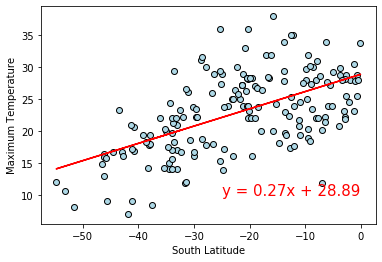

Correlation between South Latitude and Max Temperature is 0.58


In [40]:
summary_south = summary.loc[summary["Latitude"]<0,:]
x_values = summary_south.iloc[:,5]
y_values = summary_south.iloc[:,7]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors ="lightblue", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel('South Latitude')
plt.ylabel('Maximum Temperature')
plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"Correlation between South Latitude and Max Temperature is {round(correlation[0],2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

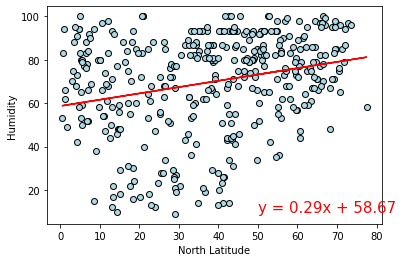

Correlation between north Latitude and Humidity is 0.25


In [47]:
summary_north = summary.loc[summary["Latitude"]>0,:]
x_values = summary_north.iloc[:,5]
y_values = summary_north.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors ="lightblue", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel('North Latitude')
plt.ylabel('Humidity')
plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"Correlation between north Latitude and Humidity is {round(correlation[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

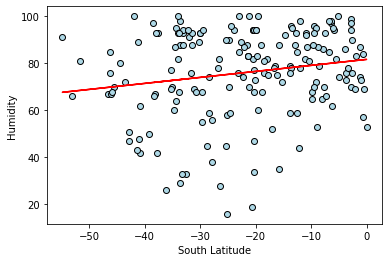

Correlation between South Latitude and Humidity is 0.18


In [41]:
summary_south = summary.loc[summary["Latitude"]<0,:]
x_values = summary_south.iloc[:,5]
y_values = summary_south.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors ="lightblue", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel('South Latitude')
plt.ylabel('Humidity')
plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"Correlation between South Latitude and Humidity is {round(correlation[0],2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

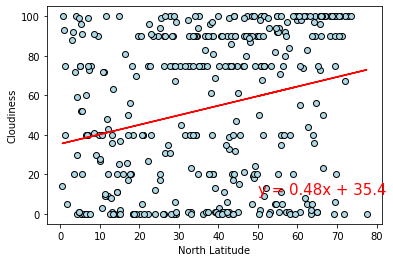

r square value is 0.25


In [42]:
summary_north = summary.loc[summary["Latitude"]>0,:]
x_values = summary_north.iloc[:,5]
y_values = summary_north.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors ="lightblue", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel('North Latitude')
plt.ylabel('Cloudiness')
plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"r square value is {round(correlation[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

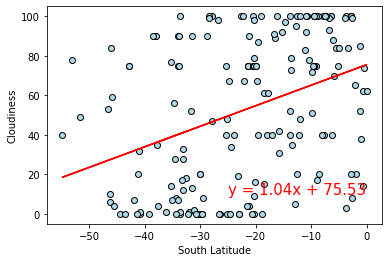

Correlation between South Latitude and Cloudiness is 0.37


In [43]:
summary_south = summary.loc[summary["Latitude"]<0,:]
x_values = summary_south.iloc[:,5]
y_values = summary_south.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors ="lightblue", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel('South Latitude')
plt.ylabel('Cloudiness')
plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"Correlation between South Latitude and Cloudiness is {round(correlation[0],2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

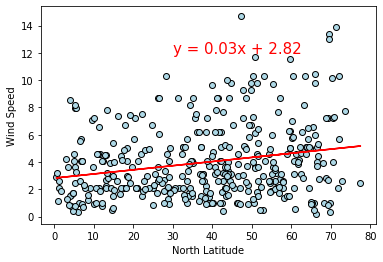

r square value is 0.23


In [44]:
summary_north = summary.loc[summary["Latitude"]>0,:]
x_values = summary_north.iloc[:,5]
y_values = summary_north.iloc[:,8]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors ="lightblue", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,12),fontsize=15,color="red")
plt.xlabel('North Latitude')
plt.ylabel('Wind Speed')
plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"r square value is {round(correlation[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

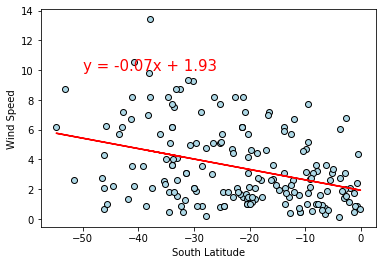

r square value is -0.36


In [45]:
summary_south = summary.loc[summary["Latitude"]<0,:]
x_values = summary_south.iloc[:,5]
y_values = summary_south.iloc[:,8]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors ="lightblue", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('South Latitude')
plt.ylabel('Wind Speed')
plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"r square value is {round(correlation[0],2)}")

In [46]:
summary.to_csv("cities.csv",encoding="utf-8", index=False, header=True)
